In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [2]:
df = pd.read_csv("../input/churn-modelling/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
missing_cols = [col for col in df.columns if df[col].isnull().any()]
missing_cols

[]

In [4]:
# Categorical columns
df_categorical = df.select_dtypes('object')

In [5]:
from sklearn.preprocessing import LabelEncoder
df_c = df.copy()
label_encoder = LabelEncoder()
for col in df_categorical.columns:
    df_c[col] = label_encoder.fit_transform(df[col])

In [6]:
y = df_c[['Exited']]
df_c.drop('Exited', axis=1, inplace=True)
X = df_c

In [7]:
from sklearn.model_selection import train_test_split
X_train_c, X_test_c, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.preprocessing import MinMaxScaler
# Standardization
standard_scaler = MinMaxScaler(feature_range=(0, 1))
X_train = pd.DataFrame(standard_scaler.fit_transform(X_train_c))
X_test = pd.DataFrame(standard_scaler.fit_transform(X_test_c))
print(X_train.head())

          0         1         2      3    4    5         6    7         8  \
0  0.325065  0.738568  0.725009  1.000  0.5  1.0  0.337838  0.0  0.432482   
1  0.910782  0.206941  0.982600  0.610  1.0  1.0  0.270270  0.9  0.000000   
2  0.164733  0.359508  0.688502  0.696  0.5  0.0  0.297297  0.8  0.600950   
3  0.499400  0.079519  0.153872  0.892  0.5  0.0  0.459459  0.9  0.666384   
4  0.882476  0.746781  0.254179  0.586  1.0  0.0  0.229730  0.6  0.000000   

          9   10   11        12  
0  0.666667  1.0  0.0  0.920254  
1  0.000000  0.0  1.0  0.452437  
2  0.000000  1.0  0.0  0.573660  
3  0.000000  1.0  1.0  0.314017  
4  0.333333  1.0  1.0  0.207710  


In [9]:
X_train.shape[1]

13

In [10]:
import keras as keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[X_train.shape[1]]))
model.add(keras.layers.Dense(100, kernel_initializer="he_normal", activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100, kernel_initializer="he_normal", activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100, kernel_initializer="he_normal", activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100, kernel_initializer="he_normal", activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(2, activation="softmax"))
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [11]:
history=model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5970 - accuracy: 0.7147
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4670 - accuracy: 0.7969
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4417 - accuracy: 0.8037
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4290 - accuracy: 0.8142
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4182 - accuracy: 0.8205
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4063 - accuracy: 0.8271
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3994 - accuracy: 0.8317
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3897 - accuracy: 0.8340
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3812 - accuracy: 0.8372
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3793 - accura

In [12]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.5514 - accuracy: 0.7975


[0.5514285564422607, 0.7975000143051147]

In [13]:
p = np.argmax(model.predict(X_test), axis=1)
p

array([1, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1568
           1       0.53      0.49      0.51       432

    accuracy                           0.80      2000
   macro avg       0.70      0.69      0.69      2000
weighted avg       0.79      0.80      0.79      2000

[[1384  184]
 [ 221  211]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


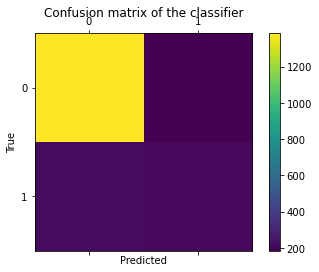

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

print(classification_report(y_test, p))

# Confusion matrix for testing dataset
labels = [0,1]
cm = confusion_matrix(y_test, p, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
